In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import scienceplots

#Exibição dos gráficos em janela externa:
#%matplotlib qt

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.size'] = 12 
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Abertura dos arquivos de dados:
freeosc1 = np.loadtxt('osc-livre-1.txt')     #tempo  theta   ref  usig
emptyfall = np.loadtxt('queda-vazio.txt')     #tempo  theta   ref  usig
fullfall = np.loadtxt('queda-full.txt')     #tempo  theta   ref  usig

In [3]:
freeosc1 = [(freeosc1[:, 0]-freeosc1[0][0]), freeosc1[:, 1], freeosc1[:, 2], freeosc1[:, 3]]
emptyfall = [(emptyfall[:, 0]-emptyfall[0][0]), emptyfall[:, 1], emptyfall[:, 2], emptyfall[:, 3]]
fullfall = [(fullfall[:, 0]-fullfall[0][0]), fullfall[:, 1], fullfall[:, 2], fullfall[:, 3]]

### $$ \text{Oscilação Não Forçada:}$$

In [4]:
#Funções dos envoltórios de decaimento exponencial (atrito viscoso):
def exp_sup(zeta, wn, t):
    return 45*(1+(np.exp(-zeta*wn*t)/np.sqrt(1-(zeta**2))))
def exp_inf(zeta, wn, t):
    return 45*(1-(np.exp(-zeta*wn*t)/np.sqrt(1-(zeta**2))))

#Funções dos envoltórios de decaimento linear (atrito seco):
def lin_sup(mu, r, l, wn, t):
    return 49*(1-(4*mu*r*wn*t/l))+45
def lin_inf(mu, r, l, wn, t):
    return 49*(-1+(4*mu*r*wn*t/l))+45

In [5]:
#Cálulo da frequência natural amortecida a partir do período entre um pico e um vale:
taud = 0.35
wd = 2*np.pi/taud

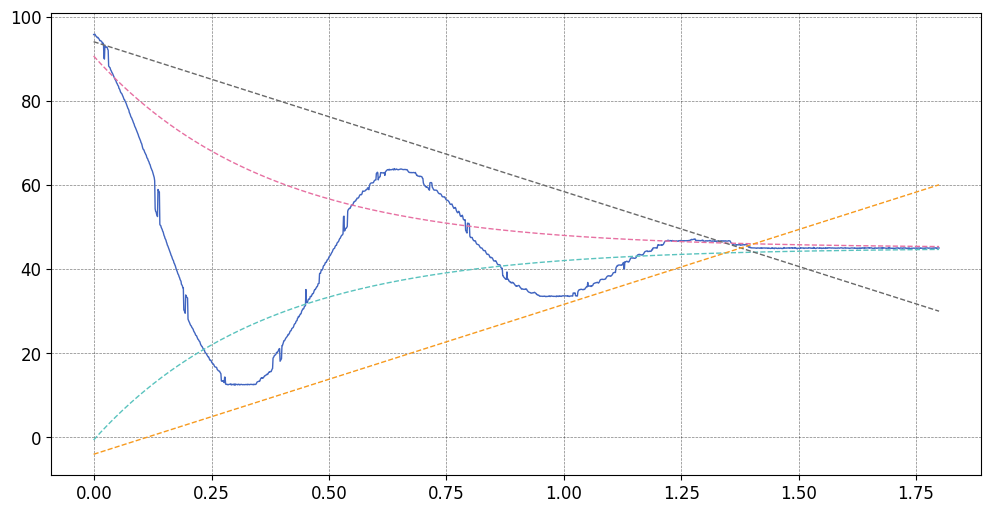

In [6]:
#Vetores de dados:
t1 = freeosc1[0][int(0.7/1e-3):int(2.5/1e-3)]-0.7
y1 = freeosc1[1][int(0.7/1e-3):int(2.5/1e-3)]-0.7

#Valores ajustados e calculados:
zeta = 0.15
wn = (wd/np.sqrt(1-(zeta**2)))
mu = 0.08

#Plot:
plt.figure()
plt.plot(t1, y1)
plt.plot(t1, exp_sup(zeta, wn, t1), linestyle='dashed')
plt.plot(t1, exp_inf(zeta, wn, t1), linestyle='dashed')
plt.plot(t1, lin_sup(mu, 10e-3, 80e-3, wn, t1), linestyle='dashed')
plt.plot(t1, lin_inf(mu, 10e-3, 80e-3, wn, t1), linestyle='dashed')
#plt.xlim(1.55, 1.75)
#plt.ylim(40, 50)
plt.show()

In [7]:
#Momento de inércia calculado:
I = 2.57e-4

#Cálculo do coeficiente de atrito viscoso:
b = 2*zeta*wn*I

b

0.0013999348307262161

### $$ \text{Descida a Vazio:}$$

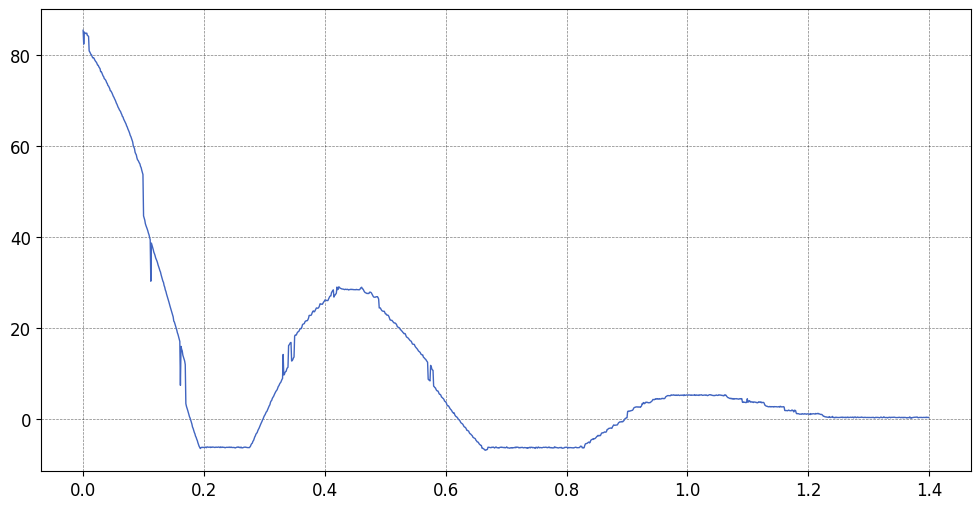

In [8]:
t2 = emptyfall[0][int(1.1/1e-3):int(2.5/1e-3)]-1.1
y2 = emptyfall[1][int(1.1/1e-3):int(2.5/1e-3)]-1.1

plt.figure()
plt.plot(t2, y2)
plt.show()

### $$ \text{Descida em Funcionamento:}$$

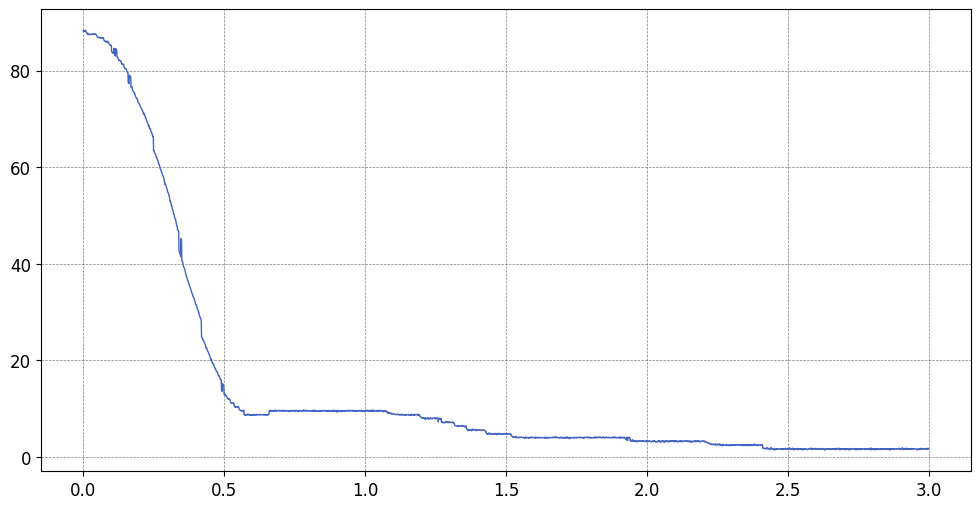

In [9]:
t3 = fullfall[0][int(3/1e-3):int(6/1e-3)]-3
y3 = fullfall[1][int(3/1e-3):int(6/1e-3)]-3

plt.figure()
plt.plot(t3, y3)
plt.show()